#  Cleared for Takeoff: A Data-Driven Risk Analysis for Strategic Aircraft Acquisition

![airplane](./image/Airplane_in_sky.jpg)

## Overview
This project aims at analyzing data from the National Transportation Safety Board [Aviation accident database](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses), which contains aviation accident records from 1962 to 2023, within the United States, its territories and possessions, and in international waters. The primary objective is to assess the safety of various aircraft to ensure our clients make well-informed and risk-conscious purchasing decisions as they expand into the aviation sector.


## Business Understanding
Our client is seeking to broaden their investment portfolio by entering new markets. They are particularly interested in acquiring and managing aircraft for both commercial and private use. As a data analyst, my objective is to identify the safest and most reliable aircraft options to support the company's entry into this aviation venture.
![Airplane Takeoff](./image/airplane_takeoff.jpg)

## Data Understanding
The dataset used in this analysis is sourced from Kaggle: [Aviation Accident Database & Synopses (up to 2023)](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses). It contains detailed records of aviation accidents investigated by the U.S. National Transportation Safety Board (NTSB) from 1962 to 2023. This information allows for a comprehensive analysis of accident patterns, helping us determine which aircraft types have the lowest risk profiles. Specifically, we will assess factors such as the number of engines, aircraft condition prior to takeoff, and geographical locations with higher accident frequencies. The goal is to identify trends and safety indicators that can guide the company in selecting safer aircraft for commercial and private operations.

In [1954]:
# import pandas to load the data and create dataframes, we use pandas methods to inspect the shape and other attributes of these data frames
import pandas as pd

In [1955]:
#used encoding latin1 because maybe our data contains special characters that cannot be read with 'utf-8'
#load the csv file using alias pd
aircraft_data = pd.read_csv('AviationData.csv', encoding = 'latin1', low_memory=False)# tells pandas to read the whole file first then determine the best datatype for each column
aircraft_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [1956]:
#Check the data types for each columns
aircraft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# Info analysis
From the information above, the dataset contains a total of 88,889 entries and 31 columns. By reviewing an overview of the data, we can identify which columns contain null values and make informed decisions on which ones to retain or drop.
Now check the relevance of each column to our goal.

In [1958]:
# checking for the percentage of null values in each column
aircraft_data.isna().mean()*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

# Dropping Columns

Columns such as `Air.carrier` have approximately 81% missing values, and `Schedule` has around 85% missing values. Let’s now evaluate their relevance to determine whether they should be retained or dropped from the dataset.

In [1961]:
#drop the Air.Carrier and schedule column due to its higher percentage of missing values
aircraft_data.drop(['Air.carrier','Schedule'], axis= 1, inplace=True)

In [1962]:
aircraft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# Making Sure columns We are interested in are Uniform and dealing with null values


## `Weather` Column

In [1965]:
aircraft_data['Weather.Condition'].value_counts()

Weather.Condition
VMC    77303
IMC     5976
UNK      856
Unk      262
Name: count, dtype: int64

From the above output `UNK` and `unk`are the same just diffrent capitalization. we make the uniform by `.str.upper()`method

In [1967]:
aircraft_data['Weather.Condition']=aircraft_data['Weather.Condition'].str.upper()

Filled the nan values with VMC since its the most frequent

In [1969]:
# filling the nan values with most frequent
aircraft_data['Weather.Condition']=aircraft_data['Weather.Condition'].fillna('VMC')

## `Make` Column

In [1971]:
#code to look at the unique types of Makes
aircraft_data['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

From the output above, `Cessna` and `CESSNA` refer to the same make, but with different capitalizations. We will standardize the `Make` column by applying the `.title()` method

In [1973]:
# making the names in Make be uniform 
aircraft_data['Make']=aircraft_data['Make'].str.title()


## `Model` Column

In [1975]:
aircraft_data['Model'].value_counts()

Model
152              2367
172              1756
172N             1164
PA-28-140         932
150               829
                 ... 
GC-1-A              1
737-3S3             1
MBB-BK117-B2        1
GLASSAIR GL25       1
M-8 EAGLE           1
Name: count, Length: 12318, dtype: int64

In [1976]:
aircraft_data['Model']=aircraft_data['Model'].str.upper()

In [1977]:
aircraft_data['Model'].value_counts()

Model
152                 2367
172                 1756
172N                1164
PA-28-140            932
150                  829
                    ... 
E75NL                  1
747-273C               1
WATCHA-MCCALL-IT       1
MD-520N                1
M-8 EAGLE              1
Name: count, Length: 11646, dtype: int64

In [1978]:
# concatenating Make and Mode
aircraft_data['Aircraft_type']=aircraft_data['Make']+" "+ aircraft_data['Model']

## `Purpose of flight` Column

In [1980]:
aircraft_data['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [1981]:
aircraft_data['Purpose.of.flight'] =aircraft_data['Purpose.of.flight'].fillna('Personal')


Missing values in the `Purpose.of.flight` columns were filled with `Personal` since it was the most frequent category, representing the majority of the data 

## `Engine Type` Column

In [1984]:
aircraft_data['Engine.Type'].value_counts()

Engine.Type
Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

# Checking for Correlation betweeen Numeric Data
I was interested in checking whether `Amateur Built` is correlated with the `Type.Of.investigation`. To do this, I'll need to convert the columns to numeric format.

In [1986]:
#Change the amateur built into a numbers 
aircraft_data['Amateur.Built']=aircraft_data['Amateur.Built'].map({'Yes': 1, 'No':0})

In [1987]:
#Change the Investigation types to numbers 
aircraft_data['Investigation.Type']=aircraft_data['Investigation.Type'].map({'Accident': 1, 'Incident':0})

In [1988]:
#Checking correlation between numeric data
aircraft_data.corr(numeric_only=True)

,Investigation.Type,Amateur.Built,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Investigation.Type,1.000000,0.061804,-0.370518,0.024367,0.025172,-0.000623,-0.348089
Amateur.Built,0.061804,1.000000,-0.106847,-0.012407,-0.001795,-0.003396,-0.049998
Number.of.Engines,-0.370518,-0.106847,1.000000,0.098505,0.046157,0.098162,0.406058
Total.Fatal.Injuries,0.024367,-0.012407,0.098505,1.000000,0.135724,0.073559,-0.015214
Total.Serious.Injuries,0.025172,-0.001795,0.046157,0.135724,1.000000,0.326849,0.052869
Total.Minor.Injuries,-0.000623,-0.003396,0.098162,0.073559,0.326849,1.000000,0.147770
Total.Uninjured,-0.348089,-0.049998,0.406058,-0.015214,0.052869,0.147770,1.000000


Cheking the correlation between numeric data there are negative correlations and weak corelation

# Cheking the Frequencies of Damages

In [1991]:
#checking type of damages 
damage_counts=aircraft_data['Aircraft.damage'].value_counts()

In [1992]:
#create a the intensity of a damage and the find its mean to see where they lie
aircraft_data['Severity.Score'] = aircraft_data['Aircraft.damage'].map({'Minor': 1, 'Substantial': 2, 'Destroyed': 3})

In [1993]:
# import matplotlib to draw graph and shows a plot inside Jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline

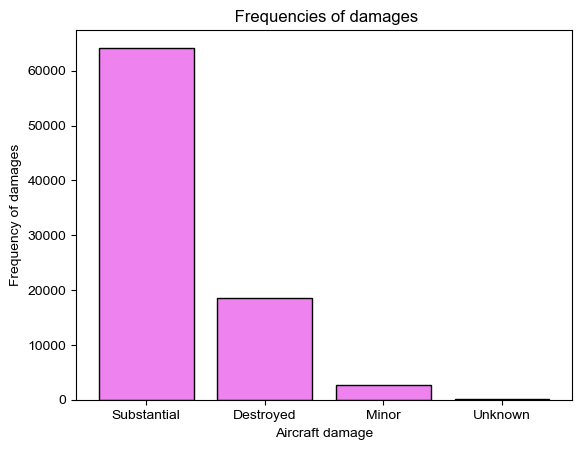

In [1994]:
plt.bar(damage_counts.index, damage_counts.values,edgecolor='black', color= 'violet')
plt.xlabel('Aircraft damage')
plt.ylabel('Frequency of damages')
plt.title(' Frequencies of damages')
plt.show()

In [1995]:
aircraft_data['Aircraft_type'].value_counts()


Aircraft_type
Cessna 152                  2366
Cessna 172                  1753
Cessna 172N                 1163
Piper PA-28-140              932
Cessna 150                   829
                            ... 
Sherman Powell KITFOX IV       1
Maule M5C                      1
Smith SONERAI-I                1
Shafer SONERAI-I               1
Royse Ralph L GLASAIR          1
Name: count, Length: 18245, dtype: int64

In [1996]:
safety_df= aircraft_data.pivot_table(index='Aircraft_type', columns= 'Aircraft.damage' ,values ='Event.Id',aggfunc='count',fill_value=0)

In [1997]:
minor_damages_safe=safety_df[(safety_df['Destroyed']==0) & (safety_df['Minor']==1) & (safety_df['Substantial']==0)]
minor_damages_safe

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Aircraft_type,,,,
2007 Savage Air Llc EPIC LT,0,1,0,0
Abruzzo GROM-1,0,1,0,0
Aero Commander 681B,0,1,0,0
Aerospatiale A-300B4,0,1,0,0
Aerospatiale ATR-42,0,1,0,0
...,...,...,...,...
Unknown GLIDER TRYKE,0,1,0,0
Us/Lta 138-S,0,1,0,0
Wayne Hooks CASSUTT III-M,0,1,0,0


In [1998]:
aircrafts_safe_list= list(minor_damages_safe.index)

# Number of engines
![Aircraft Engine](./image/airplane_engine.jpg)

In [2000]:
#grouping the number of engines to the aircraft damage
safe_numberof_engines=aircraft_data.pivot_table(index='Number.of.Engines', columns= 'Aircraft.damage' ,values ='Event.Id',aggfunc='count',fill_value=0)
safe_numberof_engines

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Number.of.Engines,,,,
0.0,173,74,842,2
1.0,13862,726,54565,50
2.0,2871,1095,5868,9
3.0,25,197,104,0
4.0,58,145,114,0
6.0,0,0,1,0
8.0,0,0,2,0


In [2001]:
engine_number_score=aircraft_data.groupby('Number.of.Engines')['Severity.Score'].mean().sort_values()
engine_number_score

Number.of.Engines
3.0    1.472393
4.0    1.725552
6.0    2.000000
8.0    2.000000
0.0    2.090909
2.0    2.180598
1.0    2.189956
Name: Severity.Score, dtype: float64

In [2002]:
safe_engine_numbers= list(engine_number_score[engine_number_score < 2].index)
safe_engine_numbers

[3.0, 4.0]

Its safe to assume that 3 and 4 engines are the most safer due to the minor severity score

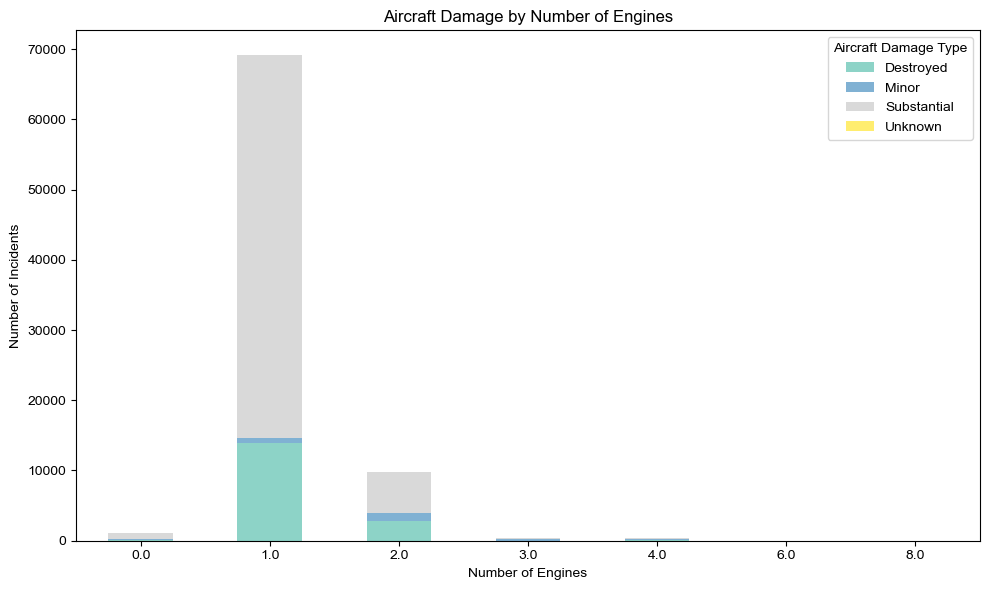

In [2004]:
# plotting a graph to indicate number of engines by aircraft dama
fig,ax= plt.subplots(figsize=(10,6))

# plotting a stacked bar graph
safe_numberof_engines.plot(kind='bar', stacked=True, ax=ax, colormap='Set3')

# customize the chart
ax.set_title('Aircraft Damage by Number of Engines')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Number of Incidents')
ax.legend(title='Aircraft Damage Type')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# Incidents and Accidents by Number of Engines

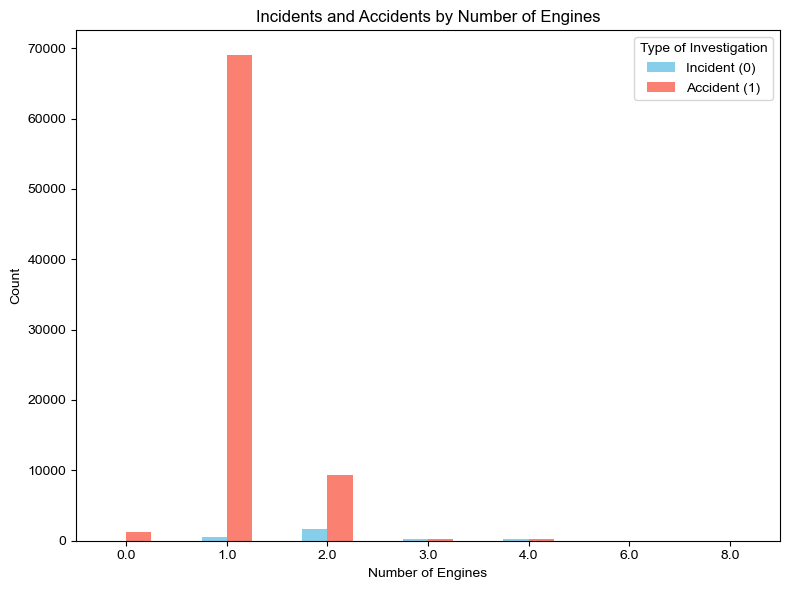

In [2006]:
#Group and count combinations of Engine count vs Type of investigation
engine_investigation_counts = aircraft_data.groupby(['Number.of.Engines', 'Investigation.Type']).size().unstack(fill_value=0)

# Rename the columns for clarity
engine_investigation_counts.columns = ['Incident (0)', 'Accident (1)']

# Plot using fig and ax
fig, ax = plt.subplots(figsize=(8, 6))
engine_investigation_counts.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'])

#Customize the plot
ax.set_title('Incidents and Accidents by Number of Engines')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Count')
ax.legend(title='Type of Investigation')
ax.set_xticklabels(engine_investigation_counts.index.astype(str),rotation=0)

#Show the plot
plt.tight_layout()
plt.show()



Observation: aircrafts with one engine has the most accidents 

# Type of engines by damages

In [2009]:
safe_type_of_engines=aircraft_data.pivot_table(index='Engine.Type', columns= 'Aircraft.damage' ,values ='Event.Id',aggfunc='count',fill_value=0)
safe_type_of_engines

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Engine.Type,,,,
Electric,2,0,8,0
Geared Turbofan,0,1,0,0
Hybrid Rocket,1,0,0,0
LR,0,0,1,0
NONE,0,0,2,0
Reciprocating,14529,853,53805,6
Turbo Fan,196,670,730,0
Turbo Jet,140,162,234,0
Turbo Prop,807,306,2035,0


In [2010]:
 engine_score=aircraft_data.groupby('Engine.Type')['Severity.Score'].mean().sort_values()

In [2011]:
# create a list of engine type with less than 2 score
safe_engine_type = list(engine_score[engine_score < 2].index)
safe_engine_type

['Geared Turbofan', 'Turbo Fan', 'Turbo Jet']

## Weather Condition with Higher number of damages 

In [2013]:
aircraft_data['Weather.Condition'].value_counts()

Weather.Condition
VMC    81795
IMC     5976
UNK     1118
Name: count, dtype: int64

A number of incidents occurred under favorable weather conditions `VMC`. This suggests that weather may not have been the primary contributing factor in these cases. Further analysis is needed to explore other contributing factors such as pilot experience, mechanical failure, or maintenance history."

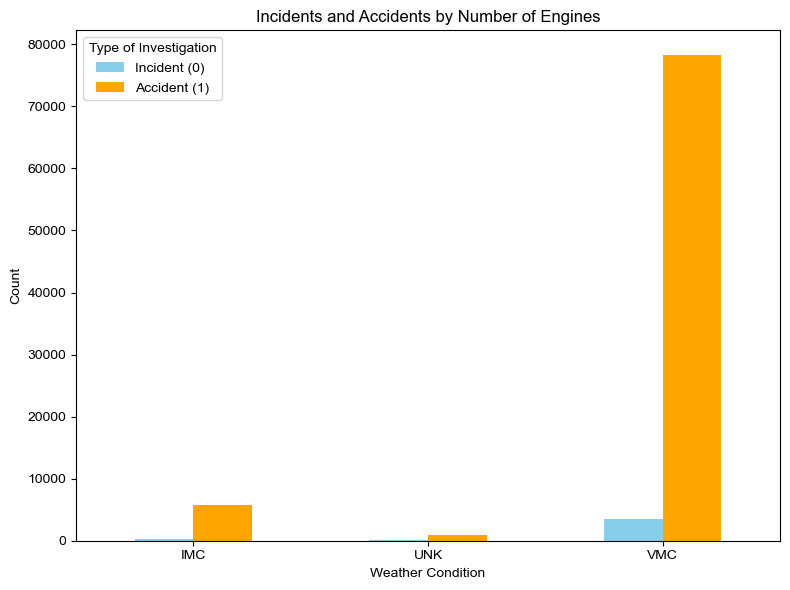

In [2015]:
# graph showing how weather condition infuenced incidents and accidents
engine_investigation_counts = aircraft_data.groupby(['Weather.Condition', 'Investigation.Type']).size().unstack(fill_value=0)

# Rename the columns for clarity
engine_investigation_counts.columns = ['Incident (0)', 'Accident (1)']

# Plot using fig and ax
fig, ax = plt.subplots(figsize=(8, 6))
engine_investigation_counts.plot(kind='bar', ax=ax, color=['skyblue', 'orange'])

#Customize the plot
ax.set_title('Incidents and Accidents by Number of Engines')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Count')
ax.legend(title='Type of Investigation', loc= 2)
ax.set_xticklabels(engine_investigation_counts.index.astype(str),rotation=0)

#Show the plot
plt.tight_layout()
plt.show()



## Grouping the purpose of flight to Aircraft.damage


In [2017]:
purpose_safety=aircraft_data.pivot_table(index='Purpose.of.flight', columns= 'Aircraft.damage' ,values ='Event.Id',aggfunc='count',fill_value=0)
purpose_safety.sort_values(by='Substantial', ascending = False)

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Purpose.of.flight,,,,
Personal,11678,1380,40505,99
Instructional,1212,159,9146,10
Aerial Application,1069,28,3600,1
Unknown,1745,895,3337,1
Business,1186,107,2630,3
Positioning,412,72,1119,0
Other Work Use,266,44,896,1
Ferry,235,27,543,0
Aerial Observation,225,12,536,1


In [2018]:
safety_by_purpose = aircraft_data.groupby('Purpose.of.flight')['Severity.Score'].mean().sort_values()
safety_by_purpose

Purpose.of.flight
PUBS                         2.000000
PUBL                         2.000000
Public Aircraft - Local      2.028986
Glider Tow                   2.075472
Banner Tow                   2.089109
Public Aircraft - State      2.098361
Instructional                2.100124
External Load                2.139130
Unknown                      2.142212
Flight Test                  2.153652
Air Race show                2.155556
Skydiving                    2.162921
Public Aircraft - Federal    2.176471
Other Work Use               2.184080
Personal                     2.192260
Positioning                  2.212102
Aerial Application           2.221631
Executive/corporate          2.240918
Ferry                        2.258385
Public Aircraft              2.267327
Business                     2.275045
Aerial Observation           2.275550
Air Race/show                2.303571
Air Drop                     2.363636
Firefighting                 2.394737
ASHO                         2.6

Observation: most severity score lie on 2. ,this means that most damage is substantial since, thats the score of the substantial. 

## Graph indicating the number of incidents over the years

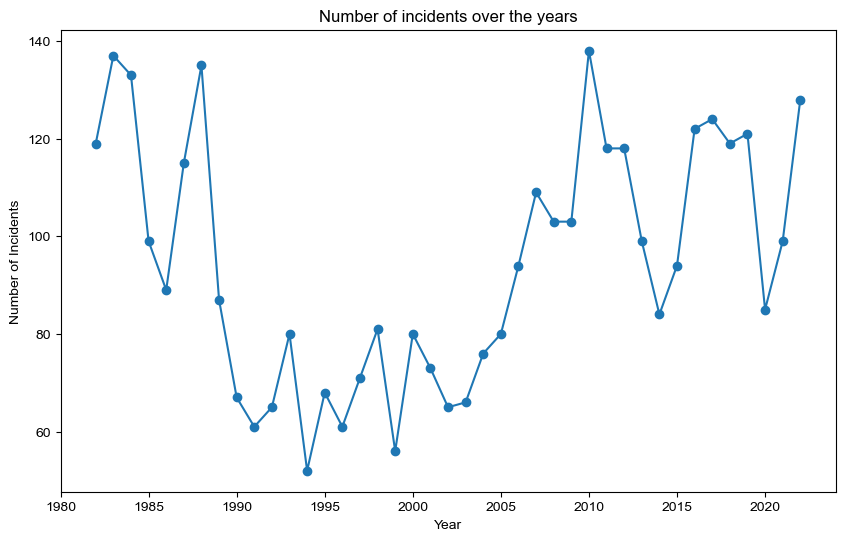

In [2021]:
# change the 'Event.date' to a datetime format
aircraft_data['Event.Date']=pd.to_datetime(aircraft_data['Event.Date'])
# Extract the year
aircraft_data['Event.Year'] = aircraft_data['Event.Date'].dt.year
# filter for incidents only
incidents_df=aircraft_data[aircraft_data['Investigation.Type'] ==0]
#count incidents per year
incidents_per_year= incidents_df['Event.Year'].value_counts().sort_index()
#plot
fig, ax =plt.subplots(figsize=(10,6))
incidents_per_year.plot(kind='line', ax=ax, marker = 'o') 
ax.set_xlabel('Year')
ax.set_ylabel('Number of Incidents')
ax.set_title('Number of incidents over the years')
plt.show()

2010 had the highest number of incidents

## Checking Number of accidents over the years

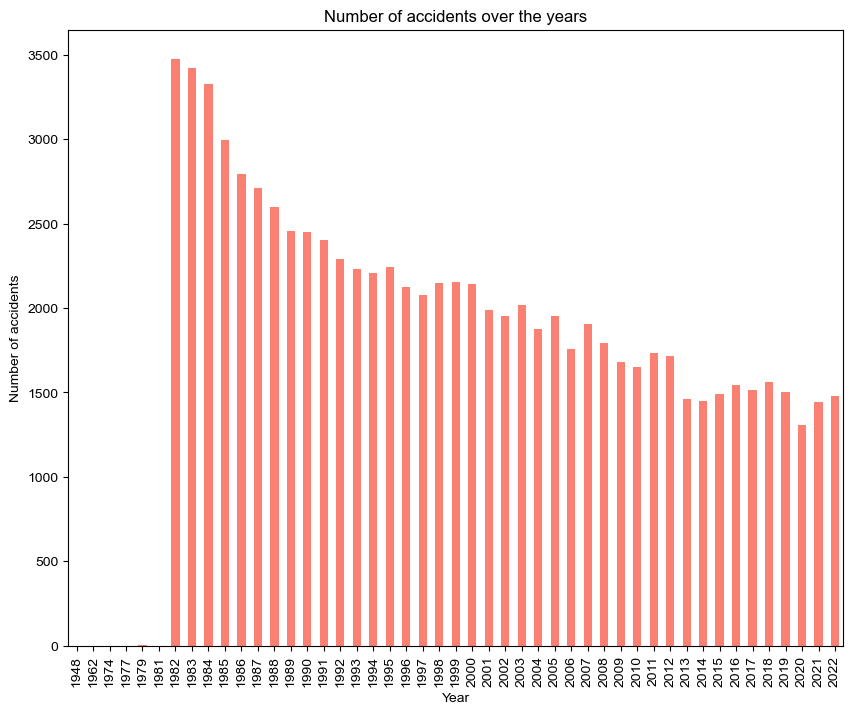

In [2024]:
accidents_df=aircraft_data[aircraft_data['Investigation.Type'] ==1]
#count incidents per year
accidents_per_year= accidents_df['Event.Year'].value_counts().sort_index()
#plot
fig, ax =plt.subplots(figsize=(10,8))
accidents_per_year.plot(kind='bar', ax=ax,color='salmon') 
ax.set_xlabel('Year')
ax.set_ylabel('Number of accidents')
ax.set_title('Number of accidents over the years')
plt.show()

The number of accidents over the years appears to be decreasing, which is a positive indication. This trend may suggest improvements in aircraft technology, safety regulations, pilot training, or maintenance practices over time.

In [2026]:
#Checking the best aircrfat from the observation we made above
filtered_df= aircraft_data[(aircraft_data['Aircraft_type'].isin(aircrafts_safe_list))
& (aircraft_data['Engine.Type'].isin(safe_engine_type)) 
& (aircraft_data['Number.of.Engines'].isin(safe_engine_numbers))]

In [2027]:
filtered_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Aircraft_type,Severity.Score,Event.Year
230,20020917X01910,1,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,NaN,NaN,PHL,PHILADELPHIA INTL,...,1.0,0.0,154.0,IMC,Takeoff,Probable Cause,03-02-1983,Mcdonnell-Douglas DC-10-10,1.0,1982
3578,20020917X04671,0,FTW83IA072,1982-12-30,"THERMAL, CA",United States,NaN,NaN,TRM,NaN,...,0.0,14.0,203.0,VMC,Climb,Probable Cause,30-12-1983,Mcdonnell-Douglas DC-10-30,NaN,1982
4080,20001214X42476,0,LAX83IA140,1983-03-11,"MINA, NV",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,186.0,VMC,Climb,Probable Cause,NaN,Mcdonnell Douglas DC 8-61,1.0,1983
4764,20001214X42949,0,DEN83IA119,1983-05-23,"COLORADO SPRING, CO",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,25.0,VMC,Taxi,Probable Cause,NaN,Boeing 727-31H,1.0,1983
5476,20001214X43869,0,MKC83IA159,1983-07-16,"ST. LOUIS, MO",United States,NaN,NaN,STL,LAMBERT-ST. LOUIS INTL.,...,0.0,0.0,65.0,VMC,Taxi,Probable Cause,NaN,Boeing 727-231A,1.0,1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73107,20130118X53100,1,DCA13LA039,2013-01-17,"Miami, FL",United States,254725N,0801630W,MIA,Miami Intl,...,0.0,0.0,397.0,VMC,NaN,LV-BMT flight crew's incorrect evaluation of t...,25-09-2020,Airbus A340 - 300,1.0,2013
74427,20131126X01052,0,ENG14WA003,2013-10-24,"Norwich, Norfolk, UK, United Kingdom",United Kingdom,524033N,0011658E,NaN,NaN,...,0.0,0.0,1.0,VMC,NaN,<br /><br />,03-11-2020,Bae Systems (Operations) Limit AVRO 146-RJ85,1.0,2013
75002,20140522X83340,0,ENG14RA014,2014-04-29,"Perth, Australia, Australia",Australia,NaN,NaN,PER,Perth,...,0.0,0.0,0.0,VMC,NaN,<br /><br />,03-11-2020,Bae AVRO146RJ - 100,1.0,2014
75950,20141029X71059,0,DCA15WA015,2014-10-22,"Frankfurt, Germany",Germany,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,VMC,NaN,NaN,25-09-2020,Boeing 747 422,1.0,2014


In [2028]:
#importing cleaned version
filtered_df.to_csv('Cleaned_Data.csv', index= True)

# Conclusion
**1. Trends in Accidents**
Accidents have significantly decreased over time, which is a sign of continuous advancements in aviation technology, safety rules, training requirements, and maintenance procedures.

**2. Safety and Engine Configuration**
Single-engine aircraft suffered the most significant and total destruction, though this may have more to do with their frequent use in general aviation than with any inherent danger. Although multi-engine aircraft tend to appear slightly safer in severity scoring, no engine type is significantly riskier when normalised by damage severity scores.

**3. Type of Engine and Safety**
Engines with an average severity score of less than two, which prioritises minor damage over significant or destroyed damage, seem to be the safest. We filter our dataframe so that `Engine.Type`are only those with minor damages. These engine types could be prioritised when considering aircraft design and procurement

**4. Incident and accident**
Both incident and accident types provide essential insights for aviation safety investigations. Incidents reveal underlying hazards and near-misses that can be addressed proactively, while accidents highlight the consequences of unresolved risks. Analyzing both helps us form a comprehensive view of aircraft safety, identify patterns, and recommend effective preventive strategies..

## Properties of Safer Aircraft
1. Use safer engine types(with severity score < 2)
2. Have more than one engine( with severity score < 2)
3. Belong to the safer aircraft type